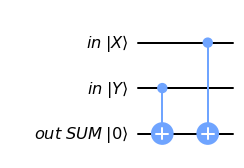

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
#SUM
X = QuantumRegister(1, "in |X⟩")
Y = QuantumRegister(1, "in |Y⟩")
sum_out = QuantumRegister(1, "out SUM |0⟩")
SUM = QuantumCircuit(X, Y, sum_out, name='SUM')
SUM.cx(1, 2)
SUM.cx(0, 2)

fig = SUM.draw('mpl', True)
SUM = SUM.to_instruction()
fig

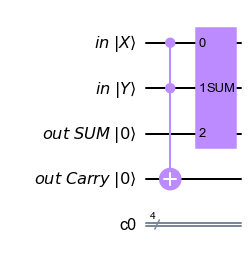

In [2]:
#half_adder
cout = QuantumRegister(1, 'out Carry |0⟩')
c = ClassicalRegister(4)
hadder = QuantumCircuit(X,Y,sum_out,cout,c)
hadder.ccx(X,Y,cout)
hadder.append(SUM,[0,1,2])

show = hadder.draw("mpl",True)
hadder = hadder.to_instruction()
show

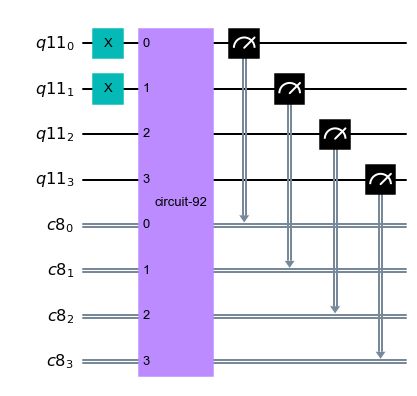

In [10]:
#testing half_adder
qu = QuantumRegister(4)
cl = ClassicalRegister(4)
circ = QuantumCircuit(qu,cl)
circ.x(qu[0])
circ.x(qu[1])
# circ.append(hadder,[0,1,2,3])
circ.append(hadder, [0, 1, 2, 3], [0, 1, 2, 3])

for i in range(0,4):
    circ.measure(qu[i],cl[i])
circ.draw("mpl",True)
# print(execute(circ,Aer.get_backend('qasm_simulator'), shots = 1).result().get_counts())